## Importación de librerías

In [1]:
# Data processing  
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualization  
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Model selection and evaluation  
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split

# Regression models  
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression

# Metrics  
# -----------------------------------------------------------------------
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Carga de datos

In [2]:
df = pd.read_csv('df_regresion.csv', index_col=0)
df.head()

,nota_anterior,tasa_asistencia,horas_sueno,edad,nota_final,nivel_dificultad_Difícil,nivel_dificultad_Fácil,nivel_dificultad_Medio,tiene_tutor_No,tiene_tutor_Sí,horario_estudio_preferido_Mañana,horario_estudio_preferido_Noche,horario_estudio_preferido_Tarde,horario_estudio_preferido_Unknown,estilo_aprendizaje_Auditivo,estilo_aprendizaje_Kinestésico,estilo_aprendizaje_Lectura/Escritura,estilo_aprendizaje_Unknown,estilo_aprendizaje_Visual
horas_estudio_semanal,,,,,,,,,,,,,,,,,,,
8.957476,0.269009,0.833002,0.445949,0.636364,84.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11.042524,0.726082,0.793121,0.102807,0.000000,72.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4.510776,0.862624,0.682795,0.625874,0.636364,80.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6.647213,0.741118,0.785623,0.765471,0.454545,78.2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1.000000,0.517917,0.431749,0.445307,0.272727,66.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Separación del conjunto de datos

In [3]:
# Variable objetivo
tv = 'nota_final'

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[tv])  # Características
y = df[tv]  # Etiqueta o resultado

In [4]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 18)
Tamaño del conjunto de prueba: (200, 18)


## Entrenamiento del modelo

In [5]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

In [6]:
# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

## Validación del modelo

### Comparación con scatterplot

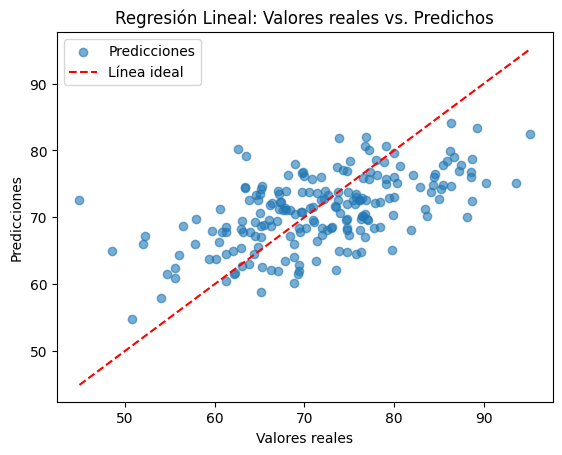

In [8]:
# Graficar valores reales vs. predichos
plt.scatter(y_test, y_pred, label="Predicciones", alpha=0.6)

# Agregar línea de referencia (y = x)
min_val = min(y_test.min(), y_pred.min())  # Valor mínimo entre reales y predichos
max_val = max(y_test.max(), y_pred.max())  # Valor máximo entre reales y predichos
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Línea ideal")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predichos")
plt.legend()
plt.show()

Si los puntos están cerca de la línea roja, el modelo acierta. En nuestro caso, sigue la tendencia, pero se dispersa bastante.

### Comparación de distribuciones

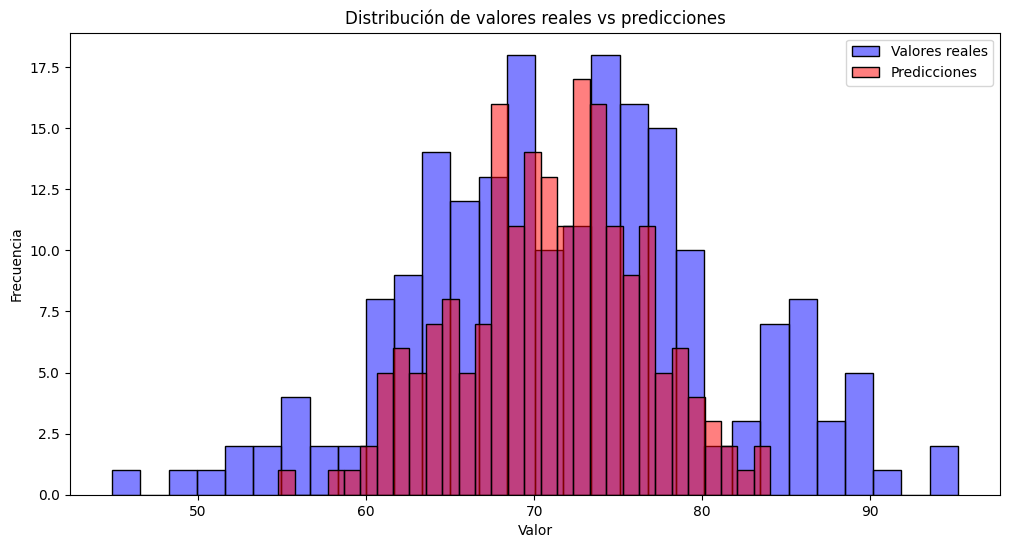

In [9]:
# Graficar valores reales vs. predichos
plt.figure(figsize=(12, 6))

n_bins = 30

# Histograma de y_test (azul)
sns.histplot(y_test, bins=n_bins, edgecolor='black', color='blue', alpha=0.5, label='Valores reales')

# Histograma de y_pred (rojo)
sns.histplot(y_pred, bins=n_bins, edgecolor='black', color='red', alpha=0.5, label='Predicciones')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs predicciones')
plt.legend()
plt.show()

En este gráfico podemos ver cómo se reparten las notas reales (azul) frente a las notas que predice el modelo (rojo):
- Como ambas distribuciones se solapan bastante, el modelo acierta la forma general.
- Las predicciones están más concentradas en el centro y hay menos valores en los extremos: el modelo tiende a la media, es decir, sube un poco las notas bajas y baja un poco las notas altas. Los valores reales se reparten por toda la distribución.

### Residuos

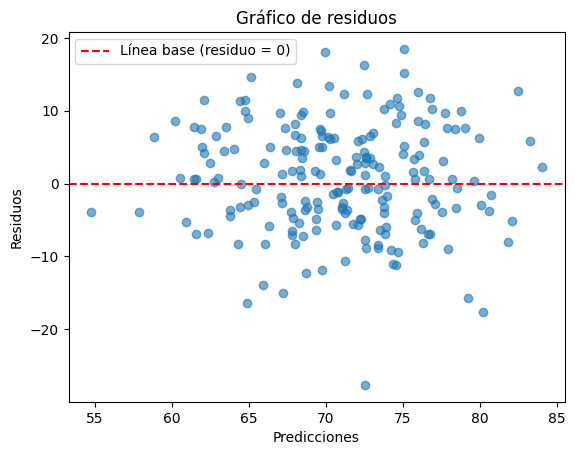

In [10]:
# Calcular los residuos
residuos = y_test - y_pred

# Graficar residuos
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", label="Línea base (residuo = 0)")

# Etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.legend()
plt.show()

Lo ideal es que los residuos estén en torno al 0 (línea roja) pero ya vemos que están muy dispersos de este valor tanto por arriba como por abajo. Esto significa que el modelo se equivoca por arriba y por abajo de 0. Encontamos también algunos outliers.

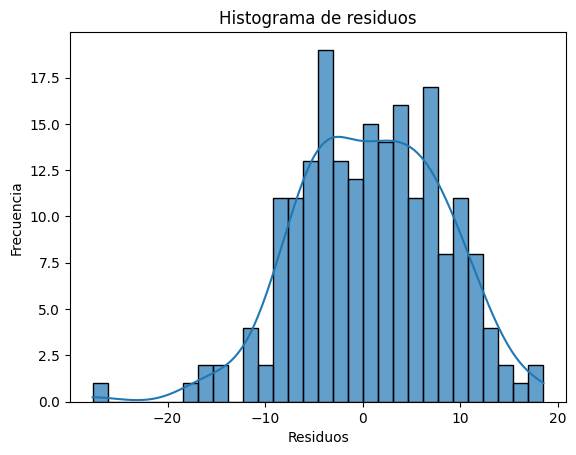

In [11]:
# Graficar histograma de los residuos
sns.histplot(residuos, bins=30, kde=True, edgecolor="black", alpha=0.7)

# Etiquetas y título
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos")

# Mostrar gráfico
plt.show()

En este histograma podemos observar cómo se reparten los residuos del modelo:
- La mayoría de residuos están cerca de 0, así que muchas predicciones salen bien.
- Hay residuos tanto positivos como negativos, o sea, a veces se queda corto y otras se pasa.

---

## Importancia de características

In [12]:
# Crear DataFrame con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': modelo.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs)  # Ordenar por magnitud

In [13]:
coef_df.sort_values(by='Coefficient', ascending=False, key=abs)

,Feature,Coefficient
0,nota_anterior,16.590023
1,tasa_asistencia,8.303360
8,tiene_tutor_Sí,2.159412
7,tiene_tutor_No,-2.159412
4,nivel_dificultad_Difícil,-1.688334
5,nivel_dificultad_Fácil,1.490011
17,estilo_aprendizaje_Visual,-1.156369
14,estilo_aprendizaje_Kinestésico,1.105918
12,horario_estudio_preferido_Unknown,0.890126
11,horario_estudio_preferido_Tarde,-0.666758


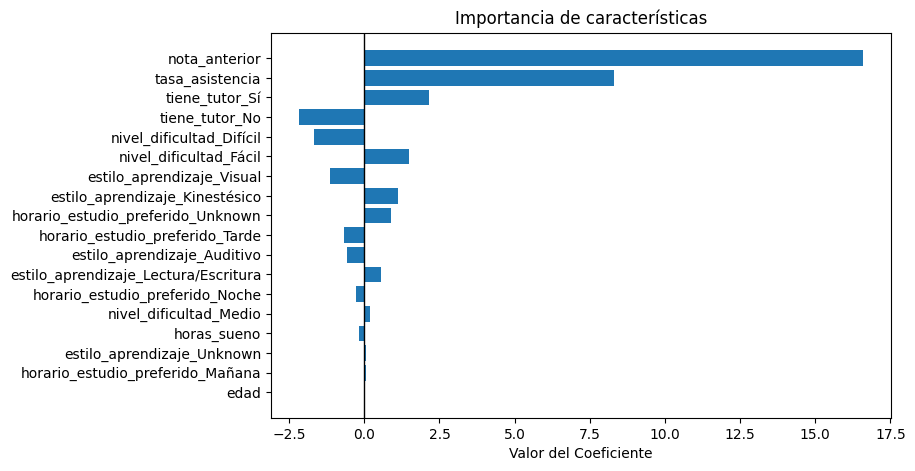

In [14]:
# Visualizar los coeficientes en un gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Valor del Coeficiente")
plt.title("Importancia de características")
plt.axvline(0, color='black', linewidth=1)  # Línea en el 0 para referencia
plt.show()

Este gráfico muestra los coeficientes del modelo de regresión (qué variables empujan la `nota_final` hacia arriba o hacia abajo):

- Las barras a la derecha (positivas) aumentan la nota predicha.
- Las barras a la izquierda (negativas) bajan la nota predicha.

Las características que más influyen son `nota_anterior` y `tasa_asistencia`. Ambas lo hacen positivamente.

## Métricas

In [15]:
# Predicciones
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [16]:
# Cálculo de métricas
metrics = {
    "train": {
        "R2": r2_score(y_train, y_train_pred),
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    },
    "test": {
        "R2": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    },
}

# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics).T

In [17]:
df_metrics.round(2)

,R2,MAE,RMSE
train,0.32,6.41,7.96
test,0.33,6.04,7.43


La tabla muestra:

- R2 (test = 0.33): el modelo explica aproximadamente un 33% de la variación de la nota final (nivel medio-bajo, hay margen de mejora).
- MAE (test = 6.04): de media. Se equivoca unas 6 notas/puntos.
- RMSE (test = 7.43): error típico más exigente. Penaliza más los fallos grandes (= 7.4 puntos).

Train y test salen muy parecidos (R2 0.32 vs 0.33, errores similares), así que no parece sobreajustado: no memoriza, pero tampoco es súper preciso.

## Entrenamiento final

In [18]:
import joblib

# Entrenar el modelo con todo el conjunto de datos
model_final = LinearRegression()
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, "modelo_regresion.pkl")

['modelo_regresion.pkl']

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Definir modelos con regularización
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
}

# Inicializar diccionario para métricas
metrics_results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir en entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas
    metrics_results[name] = {
        "Train R²": r2_score(y_train, y_train_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test R²": r2_score(y_test, y_test_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
    }

# Convertir métricas a DataFrame
df_metrics = pd.DataFrame(metrics_results).T


In [20]:
df_metrics.round(2)

,Train R²,Train MAE,Train RMSE,Test R²,Test MAE,Test RMSE
Linear,0.32,6.41,7.96,0.33,6.04,7.43
Ridge,0.32,6.41,7.96,0.33,6.04,7.43
Lasso,0.31,6.42,8.01,0.33,6.03,7.40
ElasticNet,0.27,6.67,8.28,0.28,6.18,7.69


Se compara con:

- Linear.
- Ridge.
- Lasso.
- ElasticNet.

Linear, Ridge y Lasso salen muy parecidos en test (R2 = 0.33, MAE = 6, RMSE = 7.4). ElasticNet empeora (R2 = 0.28).


### Conclusión final

El modelo predice con tendencia correcta, pero con un error típico de 6–7 puntos, y explica solo 1/3 de lo que pasa en las notas.